In [25]:
import os

# Read a specific environment variable
unpacker_path = os.environ.get("UNPACKER_PATH") # You may need to set this line manually. It should be the path to the unpacker repository.
print("UNPACKER_PATH:", unpacker_path)

UNPACKER_PATH: /Users/sbfoster/Projects/unpacker


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import json
import ROOT as r  
if os.path.exists(f"{unpacker_path}/lib/libcommon_data_products.dylib"):
    r.gSystem.Load(f"{unpacker_path}/lib/libcommon_data_products.dylib")
if os.path.exists(f"{unpacker_path}/lib/libnalu_data_products.dylib"):
    r.gSystem.Load(f"{unpacker_path}/lib/libnalu_data_products.dylib")
if os.path.exists(f"{unpacker_path}/lib/libcommon_data_products.so"):
    r.gSystem.Load(f"{unpacker_path}/lib/libcommon_data_products.so")
if os.path.exists(f"{unpacker_path}/lib/libnalu_data_products.so"):
    r.gSystem.Load(f"{unpacker_path}/lib/libnalu_data_products.so")

In [37]:
# file = r.TFile("PATH/TO/ROOT/FILE") #CHANGE THIS TO YOUR FILE
file = r.TFile(f"{unpacker_path}/examples/run00036.mid.root") #CHANGE THIS TO YOUR FILE

In [38]:
# Exampl of reading the odb
nalu_odb=file["nalu_odb"]
json_nalu_odb = json.loads(nalu_odb.odb_string.data())
json_nalu_odb.keys()

dict_keys(['Experiment', 'System', 'Programs', 'Logger', 'Runinfo', 'Elog', 'WebServer', 'History', 'Alarms', 'Equipment'])

In [39]:
def plot_nalu_waveforms(nalu_waveforms):
   """
   Plot multiple nalu waveforms on a single figure.
   """
   print(nalu_waveforms.size())
   fig,ax = plt.subplots(1, 1, figsize=(10, 5))
   for nalu_waveform in nalu_waveforms:
      ax.plot(nalu_waveform.trace,label=f"Channel {nalu_waveform.channel_num}")
   plt.legend()


In [40]:
def print_nalu_waveforms(nalu_waveforms):
    """
    Print out the trce for a nalu waveform
    """
    for nalu_waveform in nalu_waveforms:
        print(f"Channel Number: {nalu_waveform.channel_num}")
        print(f"Trace: {nalu_waveform.trace}")

In [41]:
# Set the "event" number to read from the tree
entry = 0

In [42]:
# Get the tree
tree = file.Get("tree")

In [43]:
# Print out some basically everything that is stored in this event
tree.GetEntry(entry)
neh_vec=tree.nalu_event_headers
nph_vec=tree.nalu_packet_headers
nw_vec=tree.nalu_waveforms
npf_vec=tree.nalu_packet_footers
nef_vec=tree.nalu_event_footers
nt_vec=tree.nalu_times

# print(f"packet_header: {hex(nph_vec[0].packet_header)}")
print(neh_vec[0].String())
for i_packet in range(0,nph_vec.size()):
    print(nph_vec[i_packet].String())
for i_window in range(0,nw_vec.size()):
    print(nw_vec[i_window].String())
for i_packet in range(0,npf_vec.size()):
    print(npf_vec[i_packet].String())
print(nef_vec[0].String())
print(nt_vec[0].String())



NaluEventHeader: 
    event_header:          bbbb
    event_info:            0
    event_index:           0
    event_reference_time:  5946880
    packet_size:           80
    channel_mask:          00000000ffffffff
    num_windows:           4
    num_packets:           128


NaluPacketHeader: 
    packet_header:          aaaa
    packet_info:            0
    channel:                15
    trigger_time:           5946880
    logical_position:       0
    window_position:        11


NaluPacketHeader: 
    packet_header:          aaaa
    packet_info:            0
    channel:                16
    trigger_time:           5946880
    logical_position:       0
    window_position:        12


NaluPacketHeader: 
    packet_header:          aaaa
    packet_info:            0
    channel:                17
    trigger_time:           5946880
    logical_position:       0
    window_position:        12


NaluPacketHeader: 
    packet_header:          aaaa
    packet_info:            0
  

32


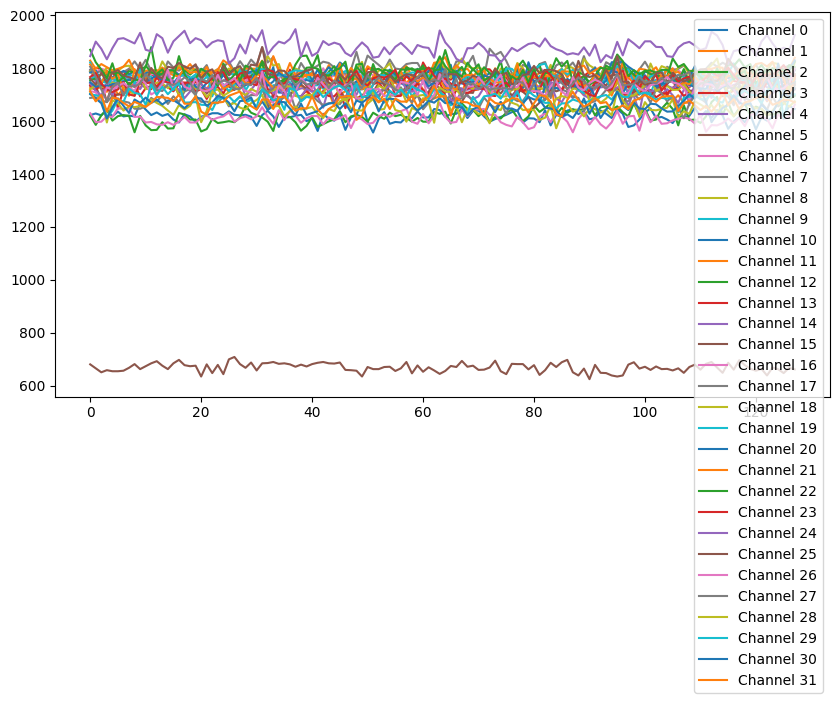

In [44]:
# Plot all the traces for each channel
tree.GetEntry(entry)
plot_nalu_waveforms(tree.nalu_waveforms)

In [45]:
# Print traces for each channel
print_nalu_waveforms(tree.nalu_waveforms)

Channel Number: 0
Trace: { 1623, 1629, 1622, 1644, 1618, 1636, 1618, 1621, 1618, 1667, 1644, 1623, 1633, 1620, 1627, 1606, 1595, 1626, 1618, 1597, 1617, 1622, 1630, 1630, 1622, 1637, 1624, 1622, 1624, 1617, 1582, 1623, 1639, 1618, 1578, 1614, 1615, 1620, 1624, 1600, 1610, 1563, 1628, 1609, 1602, 1626, 1567, 1614, 1624, 1672, 1598, 1557, 1608, 1634, 1590, 1597, 1595, 1616, 1611, 1637, 1614, 1614, 1646, 1642, 1616, 1627, 1628, 1648, 1612, 1639, 1640, 1618, 1598, 1608, 1616, 1624, 1634, 1640, 1595, 1611, 1610, 1596, 1641, 1584, 1624, 1616, 1640, 1645, 1627, 1637, 1607, 1612, 1640, 1628, 1612, 1646, 1628, 1578, 1584, 1606, 1633, 1648, 1612, 1616, 1606, 1593, 1624, 1614, 1620, 1651, 1616, 1638, 1612, 1642, 1622, 1571, 1599, 1616, 1596, 1624, 1569, 1614, 1602, 1614, 1629, 1617, 1658, 1646 }
Channel Number: 1
Trace: { 1726, 1720, 1731, 1711, 1746, 1699, 1722, 1711, 1709, 1728, 1748, 1740, 1773, 1752, 1762, 1720, 1753, 1744, 1714, 1752, 1722, 1720, 1755, 1746, 1735, 1710, 1720, 1731, 1748, 175